# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 9</span>

### Gli Algoritmi Genetici (GA)

Gli algoritmi genetici (GA) vengono spesso utilizzati per risolvere problemi di ottimizzazione basandosi sui meccanismi della selezione e della genetica naturale. La forma più semplice di algoritmo genetico funziona nel seguente modo:

1. **Parte** con una popolazione iniziale di *n* cromosomi di lunghezza *l-bit* generati casualmente (soluzioni candidate per il problema).

2. **Calcola la *fitness*** $f(x)$ di ogni cromosoma $x$ nella popolazione corrente.

3. Ripete i seguenti passaggi finché non sono stati creati $n$ discendenti:   
   A. **Seleziona** una coppia di cromosomi genitori dalla popolazione corrente, dove la probabilità di selezione è una funzione crescente della *fitness*. Nota che lo stesso cromosoma può essere selezionato più volte per diventare genitore.

   B. **Incrocia** con probabilità uniforme $P_c$ la coppia selezionata, in un punto scelto casualmente, per formare due discendenti. Se non avviene alcun *crossover*, forma due discendenti che sono copie esatte dei rispettivi genitori.

   C. **Muta** i due discendenti con probabilità $P_m$ scambiando casualmente i valori degli alleli in alcune posizioni del cromosoma e inserisce i cromosomi risultanti nella nuova popolazione.
   
4. **Sostituisce** la popolazione corrente con la nuova popolazione generata.

5. **Ripete** dallo step 2.

Questo procedimento continua fino a quando non viene soddisfatto un criterio di terminazione, come ad esempio un numero massimo di iterazioni o il raggiungimento di un certo valore di *fitness*. Nota che *crossover* e mutazione distruggono le vecchie soluzioni. L'effetto della selezione è quello di orientare gradualmente la procedura di campionamento verso le istanze di schemi il cui *fitness* è stimato essere superiore alla media. La mutazione aiuta a prevenire il blocco della popolazione aggiungendo diversità.

### Il Problema del Commesso Viaggiatore (TSP)

Il problema del commesso viaggiatore (TSP) è un problema di ottimizzazione combinatoria che consiste in un commesso che deve visitare $N$ città ritornando alla città di partenza e senza passare due volte per una stessa città. La sfida del problema è di minimizzare la lunghezza totale del viaggio. In particolare, si vuole minimizzata una delle seguenti *cost/loss functions*: 

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

o

$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$

con $\vec{x}_{N+1}=\vec{x}_1$, cercando una particolare permutazione della sequenza ordinata delle città. 

### Exercise 09.1

In questo esercizio viene chiesto di scrivere un codice per ottimizzare un percorso tra:

- 34 città disposte casualmente su una circonferenza
- 34 città disposte casualmente all'interno di un quadrato

Per risolvere il problema del commesso viaggiatore ho definito un insieme di classi che utilizzano un approccio basato sugli algoritmi genetici. La classe *City* è un vettore a due componenti che rappresenta una città con coordinate, la classe *Path* è un *field* di *City* che rappresenta una sequenza di città con indice, la classe *Individual* è una sequenza di interi che rappresenta una potenziale soluzione con operazioni di algoritmo genetico come mutazioni e *crossover*, e la classe *Population* è un vettore di *Individual* che gestisce una raccolta di individui ed esegue la selezione e la valutazione della *fitness* attraverso $L^{(2)}$. Per far funzionare il codice bisogna passare da linea di comando *circle* o *square* a seconda del tipo di percorso che si vuole ottimizzare. Di seguito sono riassunti alcuni metodi principali, rimando però al mio codice per una comprensione dettagliata della struttura delle classi.

All'interno della classe *Individual* è presente un metodo *check_bonds()* per verificare i vincoli del problema, ovvero che venga visitata ogni città una e una sola volta e che alla fine del percorso si ritorni alla città di partenza. Nota che nel vettore di interi che definisce un individuo è stato impostato il primo e l'ultimo elemento a 0, così da ridurre la degenerazione del percorso più breve a 2, che corrisponde a percorrere il percorso in senso orario e antiorario.

Nella classe *Population* è presente l'operatore di selezione che, dato un certo parametro $p$, dopo che la popolazione è stata ordinata secondo la *fitness*, seleziona un individuo $j$ con probabilità: 

$$ j= int(M \times r^p) $$

dove $M$ è il numero di individui in una popolazione e $r$ è un numero casuale uniforme in $[0,1)$.

Nella classe *Individual* sono implementati 4 operatori di mutazione:

1. permutazione a coppie di città
2. spostamento di $n$ posizioni per $m$ città contigue 
3. permutazione tra $m$ città contigue con altre (diverse) $m$ città contigue
4. inversione dell'ordine di $m$ città

Sempre nella classe *Individual* è presente anche l'operatore di *crossover* che dati due individui selezionati, taglia i loro percorsi nella stessa posizione conservando la prima parte e completa i percorsi con le città mancanti aggiungendole nell'ordine in cui compaiono nel consorte.

Per risolvere il problema è stata considerata una popolazione di 300 individui e fatta evolvere per 300 generazioni. Il parametro di selezione è stato fissato a $p=2$, il *crossover* è stato applicato con probabilità $P_c=0.70$, mentre le mutazioni con probabilità $P_m=0.10$.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import imageio.v2 as imageio
import shutil
import os
from IPython.display import Image, display

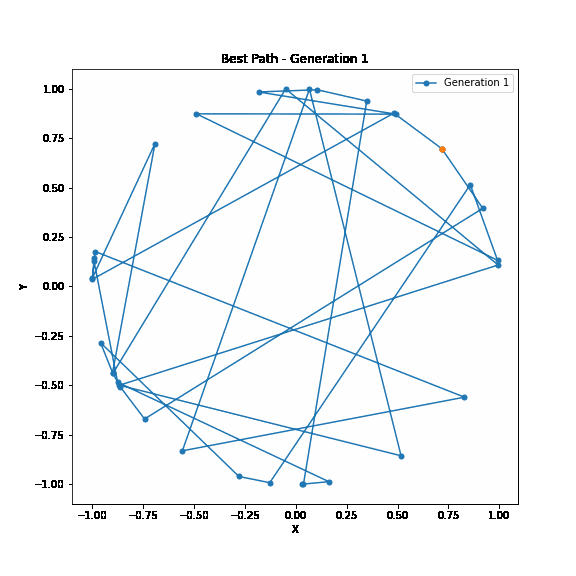

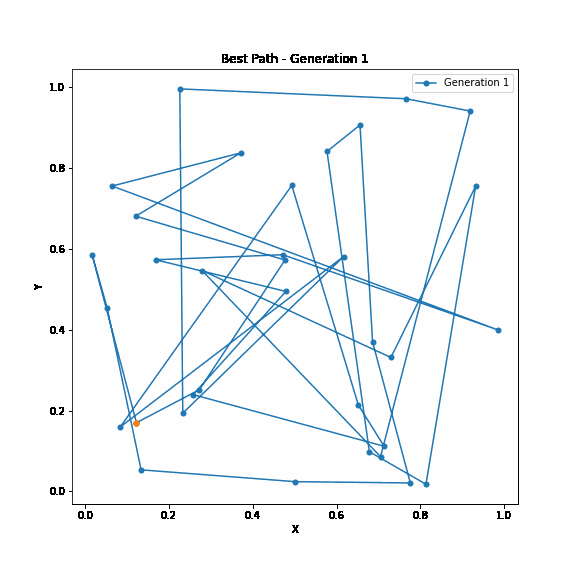

In [2]:
def read_path(filename):
    path = []
    with open(filename, 'r') as f:
        for line in f:
            x, y = map(float, line.strip().split(','))
            path.append((x, y))
    return path

def plot_path(path, generation, output_dir):
    x, y = zip(*path)
    plt.figure(figsize=(8,8))
    plt.plot(x, y, 'o-', markersize=5, label=f'Generation {generation}')
    plt.plot([x[0], x[-1]], [y[0], y[-1]], 'o-', markersize=5) # Connect start and end
    plt.title(f'Best Path - Generation {generation}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.savefig(os.path.join(output_dir, f'gen_{generation}.png'))
    plt.close()

def create_gif(image_folder, output_gif):
    images = []
    for file_name in sorted(os.listdir(image_folder), key=lambda x: int(x.split('_')[1].split('.')[0])):
        if file_name.endswith('.png'):
            file_path = os.path.join(image_folder, file_name)
            images.append(imageio.imread(file_path))
    imageio.mimsave(output_gif, images, duration=0.5)

output_dir = 'circle_images'
if os.path.exists(output_dir):  # If directory exists, remove it
    shutil.rmtree(output_dir)
os.makedirs(output_dir) 

for gen in range(300):  # Update this range to match the number of generations
    filename = f'BEST_PATHS_circle/best_path_gen_{gen+1}.txt'
    path = read_path(filename)
    plot_path(path, gen+1, output_dir)

create_gif(output_dir, 'best_paths_circle.gif')
display(Image(filename='best_paths_circle.gif'))

output_dir = 'square_images'
if os.path.exists(output_dir):  # If directory exists, remove it
    shutil.rmtree(output_dir)
os.makedirs(output_dir) 

for gen in range(300):  # Update this range to match the number of generations
    filename = f'BEST_PATHS_square/best_path_gen_{gen+1}.txt'
    path = read_path(filename)
    plot_path(path, gen+1, output_dir)

create_gif(output_dir, 'best_paths_square.gif')
display(Image(filename='best_paths_square.gif'))

In [3]:
best_loss_circle = np.loadtxt('best_loss_circle.txt')
mean_loss_circle = np.loadtxt('mean_loss_circle.txt')
best_loss_square = np.loadtxt('best_loss_square.txt')
mean_loss_square = np.loadtxt('mean_loss_square.txt')

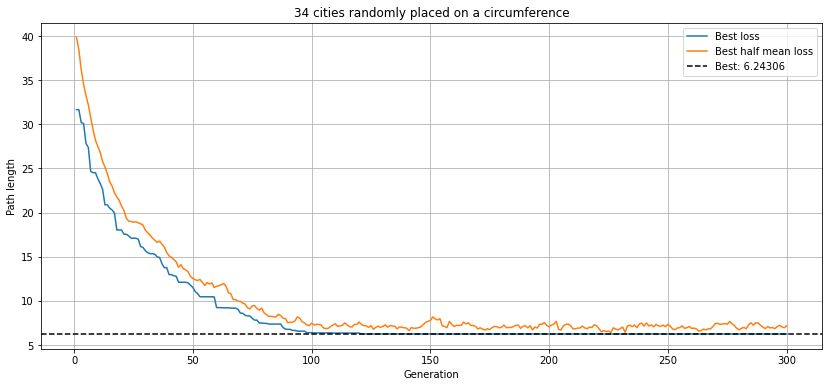

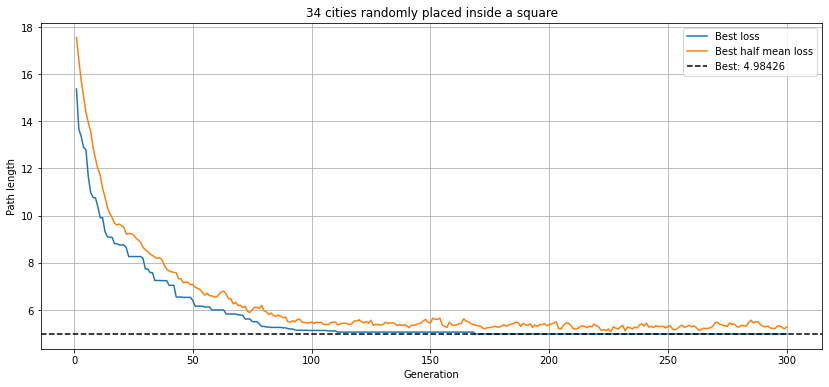

In [4]:
gen = np.arange(len(best_loss_circle)) + 1
plt.figure(figsize=(14,6))
plt.plot(gen, best_loss_circle, label='Best loss')
plt.plot(gen, mean_loss_circle, label='Best half mean loss')
plt.axhline(best_loss_circle[299], color = "k", linestyle = "--", label = "Best: " + str(best_loss_circle[299]))
plt.title('34 cities randomly placed on a circumference') 
plt.xlabel('Generation')
plt.ylabel('Path length')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(14,6))
plt.plot(gen, best_loss_square, label='Best loss')
plt.plot(gen, mean_loss_square, label='Best half mean loss')
plt.axhline(best_loss_square[299], color = "k", linestyle = "--", label = "Best: " + str(best_loss_square[299]))
plt.title('34 cities randomly placed inside a square') 
plt.xlabel('Generation')
plt.ylabel('Path length')
plt.legend()
plt.grid()
plt.show()

Notiamo che nel primo caso sono sufficienti circa 120 generazioni affinchè l'algoritmo converga, mentre per il secondo tipo di percorso ne occorrono circa 170. Poichè entrambi i percorsi finali non presentano incroci, posso ritenermi soddisfatta del mio codice.